In [2]:
%matplotlib inline
import pandas as pd
import numpy as np


In [7]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],
   ...:                   columns=['one', 'two', 'three'])
   ...: 
        

In [8]:
df 

,one,two,three
a,1.536049,0.783848,-1.292990
c,-0.424671,0.015393,-2.187774
e,-0.354277,-1.207864,-0.674545
f,0.474540,-0.967538,0.689389
h,0.546871,-1.203890,0.547324


In [11]:
df['four'] = 'bar'
df

,one,two,three,four
a,1.536049,0.783848,-1.292990,bar
c,-0.424671,0.015393,-2.187774,bar
e,-0.354277,-1.207864,-0.674545,bar
f,0.474540,-0.967538,0.689389,bar
h,0.546871,-1.203890,0.547324,bar


In [15]:
df['five'] = df['one'] > 0  #true false for comparison to column 5
df

,one,two,three,four,five
a,1.536049,0.783848,-1.292990,bar,True
c,-0.424671,0.015393,-2.187774,bar,False
e,-0.354277,-1.207864,-0.674545,bar,False
f,0.474540,-0.967538,0.689389,bar,True
h,0.546871,-1.203890,0.547324,bar,True


In [16]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,1.536049,0.783848,-1.292990,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-0.424671,0.015393,-2.187774,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.354277,-1.207864,-0.674545,bar,False
f,0.474540,-0.967538,0.689389,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.546871,-1.203890,0.547324,bar,True


In [17]:
df2['one']

a    1.536049
b         NaN
c   -0.424671
d         NaN
e   -0.354277
f    0.474540
g         NaN
h    0.546871
Name: one, dtype: float64

In [18]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [19]:
df2['four'].notnull()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [20]:
df2.isnull()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [26]:
None == None


True

In [28]:
np.nan == np.nan

False

In [29]:
np.nan != np.nan

True

In [30]:
df2['one'] == np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

In [32]:
df2 = df.copy()
df2['timestamp'] = pd.Timestamp('20120101')
df2

,one,two,three,four,five,timestamp
a,1.536049,0.783848,-1.292990,bar,True,2012-01-01
c,-0.424671,0.015393,-2.187774,bar,False,2012-01-01
e,-0.354277,-1.207864,-0.674545,bar,False,2012-01-01
f,0.474540,-0.967538,0.689389,bar,True,2012-01-01
h,0.546871,-1.203890,0.547324,bar,True,2012-01-01


In [33]:
df2.ix[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan
df2

,one,two,three,four,five,timestamp
a,NaN,0.783848,-1.292990,bar,True,NaT
c,NaN,0.015393,-2.187774,bar,False,NaT
e,-0.354277,-1.207864,-0.674545,bar,False,2012-01-01
f,0.474540,-0.967538,0.689389,bar,True,2012-01-01
h,NaN,-1.203890,0.547324,bar,True,NaT


In [35]:
df2.get_dtype_counts() # gets how many columns of data types...

bool              1
datetime64[ns]    1
float64           3
object            1
dtype: int64

In [40]:
s = pd.Series([1,2,3])
s.loc[0] = None
s

0   NaN
1     2
2     3
dtype: float64

In [41]:
s = pd.Series(["a", "b", "c"])
s

0    a
1    b
2    c
dtype: object

In [43]:
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

In [54]:
a = pd.DataFrame(np.random.randn(5, 2), index=['a', 'c', 'e', 'f', 'h'],
   ...:                   columns=['one', 'two'])
   ...: 
a

,one,two
a,-0.299463,0.324316
c,-0.810326,-0.486111
e,-0.617180,-1.778241
f,-1.190197,1.236386
h,-0.677732,-0.755392


In [59]:
a.ix[['a', 'c'], ['one']] = np.nan

a


,one,two
a,NaN,0.324316
c,NaN,-0.486111
e,-0.617180,-1.778241
f,-1.190197,1.236386
h,-0.677732,-0.755392


In [75]:
b = a.copy()
b['tree'] = df['three']
b

,one,two,tree
a,NaN,0.324316,-1.292990
c,NaN,-0.486111,-2.187774
e,-0.617180,-1.778241,-0.674545
f,-1.190197,1.236386,0.689389
h,-0.677732,-0.755392,0.547324


In [76]:
a + b

,one,tree,two
a,NaN,NaN,0.648631
c,NaN,NaN,-0.972221
e,-1.234361,NaN,-3.556482
f,-2.380394,NaN,2.472772
h,-1.355464,NaN,-1.510783


In [84]:
dd = b.copy()
dd

,one,two,tree
a,NaN,0.324316,-1.292990
c,NaN,-0.486111,-2.187774
e,-0.617180,-1.778241,-0.674545
f,-1.190197,1.236386,0.689389
h,-0.677732,-0.755392,0.547324


In [87]:
dd.ix[['h'],['one']] = np.nan
dd

,one,two,tree
a,NaN,0.324316,-1.292990
c,NaN,-0.486111,-2.187774
e,-0.617180,-1.778241,-0.674545
f,-1.190197,1.236386,0.689389
h,NaN,-0.755392,0.547324


In [88]:
dd['one'].sum()

-1.807377625181305

In [89]:
dd.mean(1) #average of rows... add rows/3

a   -0.484337
c   -1.336942
e   -1.023322
f    0.245193
h   -0.104034
dtype: float64

In [91]:
dd.cumsum() #add columns down and keep adding...

,one,two,tree
a,NaN,0.324316,-1.292990
c,NaN,-0.161795,-3.480764
e,-0.617180,-1.940036,-4.155309
f,-1.807378,-0.703650,-3.465920
h,NaN,-1.459042,-2.918596


In [96]:
dd.groupby('one').mean()

,two,tree
one,,
-1.190197,1.236386,0.689389
-0.617180,-1.778241,-0.674545


In [97]:
df2

,one,two,three,four,five,timestamp
a,NaN,0.783848,-1.292990,bar,True,NaT
c,NaN,0.015393,-2.187774,bar,False,NaT
e,-0.354277,-1.207864,-0.674545,bar,False,2012-01-01
f,0.474540,-0.967538,0.689389,bar,True,2012-01-01
h,NaN,-1.203890,0.547324,bar,True,NaT


In [99]:
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,0.783848,-1.292990,bar,True,1970-01-01
c,0.000000,0.015393,-2.187774,bar,False,1970-01-01
e,-0.354277,-1.207864,-0.674545,bar,False,2012-01-01
f,0.474540,-0.967538,0.689389,bar,True,2012-01-01
h,0.000000,-1.203890,0.547324,bar,True,1970-01-01


In [100]:
df2['four'].fillna('missing')

a    bar
c    bar
e    bar
f    bar
h    bar
Name: four, dtype: object

In [102]:
dd

,one,two,tree
a,NaN,0.324316,-1.292990
c,NaN,-0.486111,-2.187774
e,-0.617180,-1.778241,-0.674545
f,-1.190197,1.236386,0.689389
h,NaN,-0.755392,0.547324


In [107]:
dd.fillna(method='pad')

,one,two,tree
a,NaN,0.324316,-1.292990
c,NaN,-0.486111,-2.187774
e,-0.617180,-1.778241,-0.674545
f,-1.190197,1.236386,0.689389
h,-1.190197,-0.755392,0.547324


In [108]:
df2

,one,two,three,four,five,timestamp
a,NaN,0.783848,-1.292990,bar,True,NaT
c,NaN,0.015393,-2.187774,bar,False,NaT
e,-0.354277,-1.207864,-0.674545,bar,False,2012-01-01
f,0.474540,-0.967538,0.689389,bar,True,2012-01-01
h,NaN,-1.203890,0.547324,bar,True,NaT


In [115]:
df2.fillna(method='pad')

,one,two,three,four,five,timestamp
a,NaN,0.783848,-1.292990,bar,True,NaT
c,NaN,0.015393,-2.187774,bar,False,NaT
e,-0.354277,-1.207864,-0.674545,bar,False,2012-01-01
f,0.474540,-0.967538,0.689389,bar,True,2012-01-01
h,0.474540,-1.203890,0.547324,bar,True,2012-01-01


In [117]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff

,A,B,C
0,0.382874,-0.622713,-0.399651
1,-1.948006,1.247825,-2.235561
2,-0.275140,1.363205,0.686428
3,-0.922393,0.293151,0.456306
4,-1.427556,-1.033055,0.188273
5,-2.406840,-0.851014,-0.100649
6,-0.053056,1.340726,0.410458
7,-0.149085,0.323123,-0.389454
8,-0.465198,-0.551391,-0.979198
9,0.119734,-1.859501,0.081918


In [124]:
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan
dff

,A,B,C
0,0.382874,-0.622713,-0.399651
1,-1.948006,1.247825,-2.235561
2,-0.275140,1.363205,0.686428
3,NaN,0.293151,0.456306
4,NaN,NaN,0.188273
5,-2.406840,NaN,NaN
6,-0.053056,1.340726,NaN
7,-0.149085,0.323123,NaN
8,-0.465198,-0.551391,-0.979198
9,0.119734,-1.859501,0.081918


In [125]:
dff.fillna(dff.mean())

,A,B,C
0,0.382874,-0.622713,-0.399651
1,-1.948006,1.247825,-2.235561
2,-0.275140,1.363205,0.686428
3,-0.599340,0.293151,0.456306
4,-0.599340,0.191803,0.188273
5,-2.406840,0.191803,-0.314498
6,-0.053056,1.340726,-0.314498
7,-0.149085,0.323123,-0.314498
8,-0.465198,-0.551391,-0.979198
9,0.119734,-1.859501,0.081918


In [127]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.382874,-0.622713,-0.399651
1,-1.948006,1.247825,-2.235561
2,-0.275140,1.363205,0.686428
3,NaN,0.293151,0.456306
4,NaN,0.191803,0.188273
5,-2.406840,0.191803,-0.314498
6,-0.053056,1.340726,-0.314498
7,-0.149085,0.323123,-0.314498
8,-0.465198,-0.551391,-0.979198
9,0.119734,-1.859501,0.081918


In [128]:
dff.where(pd.notnull(dff), dff.mean(), axis = 'columns')

,A,B,C
0,0.382874,-0.622713,-0.399651
1,-1.948006,1.247825,-2.235561
2,-0.275140,1.363205,0.686428
3,-0.599340,0.293151,0.456306
4,-0.599340,0.191803,0.188273
5,-2.406840,0.191803,-0.314498
6,-0.053056,1.340726,-0.314498
7,-0.149085,0.323123,-0.314498
8,-0.465198,-0.551391,-0.979198
9,0.119734,-1.859501,0.081918


In [140]:
dfx = df.copy()
dfx
dfx.ix[['a', 'c','e','f', 'h'], ['one']] = np.nan
dfx


,one,two,three,four,five
a,NaN,0.783848,-1.292990,bar,True
c,NaN,0.015393,-2.187774,bar,False
e,NaN,-1.207864,-0.674545,bar,False
f,NaN,-0.967538,0.689389,bar,True
h,NaN,-1.203890,0.547324,bar,True


In [142]:
dfx.dropna(axis=0)

,one,two,three,four,five


In [144]:
dfx.dropna(axis=1)

,two,three,four,five
a,0.783848,-1.292990,bar,True
c,0.015393,-2.187774,bar,False
e,-1.207864,-0.674545,bar,False
f,-0.967538,0.689389,bar,True
h,-1.203890,0.547324,bar,True


In [145]:
dfx['one'].dropna()

Series([], Name: one, dtype: float64)

In [150]:
dfk = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
   ....:                    'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
   ....: 
dfk

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [151]:
dfk.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [152]:
dfk.interpolate(method='barycentric')

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [153]:
dfk.interpolate(method='pchip')

,A,B
0,1.000000,0.250000
1,2.100000,1.130135
2,3.429309,2.337586
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [154]:
dfk.interpolate(method='spline', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [158]:
dfk.interpolate(method='polynomial', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-4.161538
2,3.547059,-2.911538
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [161]:
np.random.seed(2)
np

<module 'numpy' from '/Users/Nedim/anaconda/lib/python3.5/site-packages/numpy/__init__.py'>

In [162]:
ser = pd.Series(np.arange(1, 10.1, .25) **2 + np.random.randn(37))
ser

0       0.583242
1       1.506233
2       0.113804
3       4.702771
4       2.206564
5       4.220753
6       6.752881
7       6.317212
8       7.942048
9       9.653492
10     12.801454
11     16.354708
12     16.041539
13     16.944575
14     20.789058
15     21.966340
16     24.980870
17     28.737501
18     29.502129
19     33.071525
20     35.121892
21     38.906066
22     42.506570
23     44.573721
24     48.661178
25     52.326316
26     55.612345
27     58.874888
28     62.578783
29     67.909005
30     71.980943
31     78.793867
32     78.565232
33     85.675227
34     90.620445
35     96.422134
36    100.501857
dtype: float64

In [163]:
bad = np.array([4, 13, 14, 15, 16, 17, 18 , 20, 29])
bad

array([ 4, 13, 14, 15, 16, 17, 18, 20, 29])

In [165]:
ser[bad] = np.nan
ser

0       0.583242
1       1.506233
2       0.113804
3       4.702771
4            NaN
5       4.220753
6       6.752881
7       6.317212
8       7.942048
9       9.653492
10     12.801454
11     16.354708
12     16.041539
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19     33.071525
20           NaN
21     38.906066
22     42.506570
23     44.573721
24     48.661178
25     52.326316
26     55.612345
27     58.874888
28     62.578783
29           NaN
30     71.980943
31     78.793867
32     78.565232
33     85.675227
34     90.620445
35     96.422134
36    100.501857
dtype: float64

In [166]:
methods = ['linear', 'quadratic', 'cubic']
methods

['linear', 'quadratic', 'cubic']

In [169]:
df = pd.DataFrame({m:ser.interpolate(method=m) for m in methods})
df 

,cubic,linear,quadratic
0,0.583242,0.583242,0.583242
1,1.506233,1.506233,1.506233
2,0.113804,0.113804,0.113804
3,4.702771,4.702771,4.702771
4,4.966464,4.461762,5.920688
5,4.220753,4.220753,4.220753
6,6.752881,6.752881,6.752881
7,6.317212,6.317212,6.317212
8,7.942048,7.942048,7.942048
9,9.653492,9.653492,9.653492


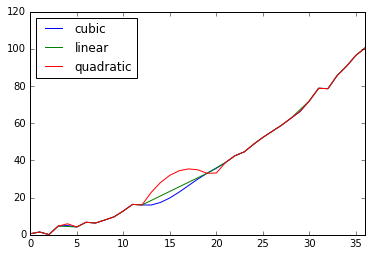

In [170]:
df.plot()

In [171]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))
ser

0     0.010250
1     0.013017
2     0.025551
3     0.027202
4     0.041798
5     0.045679
6     0.048868
7     0.067144
8     0.082095
9     0.095288
10    0.110583
11    0.112776
12    0.133954
13    0.169225
14    0.170477
15    0.176712
16    0.186627
17    0.187287
18    0.214636
19    0.214924
20    0.220838
21    0.232118
22    0.245811
23    0.247177
24    0.259745
25    0.263779
26    0.269389
27    0.274059
28    0.283756
29    0.285604
        ...   
70    0.643842
71    0.657512
72    0.661481
73    0.662202
74    0.699521
75    0.736747
76    0.738400
77    0.748778
78    0.764960
79    0.776559
80    0.778008
81    0.797405
82    0.798586
83    0.800258
84    0.826250
85    0.832017
86    0.845113
87    0.850851
88    0.868917
89    0.881652
90    0.889520
91    0.913915
92    0.918459
93    0.953742
94    0.964551
95    0.970580
96    0.972911
97    0.983153
98    0.988510
99    0.993852
dtype: float64

In [176]:
new_index = ser.index | pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75])
interp_s = ser.reindex(new_index).interpolate(method='pchip')
interp_s[49:51]

49.00    0.471410
49.25    0.476841
49.50    0.481780
49.75    0.485998
50.00    0.489266
50.25    0.491814
50.50    0.493995
50.75    0.495763
51.00    0.497074
dtype: float64

In [177]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13])
ser

0   NaN
1   NaN
2     5
3   NaN
4   NaN
5   NaN
6    13
dtype: float64

In [179]:
ser.interpolate(limit=2)  # limit_direction == 'forward'

0   NaN
1   NaN
2     5
3     7
4     9
5   NaN
6    13
dtype: float64

In [180]:
ser.interpolate(limit=1, limit_direction='backward')

0   NaN
1     5
2     5
3   NaN
4   NaN
5    11
6    13
dtype: float64

In [181]:
ser.interpolate(limit=1, limit_direction='both')

0   NaN
1     5
2     5
3     7
4   NaN
5    11
6    13
dtype: float64

In [182]:
ser = pd.Series([0., 1., 2., 3., 4.])
ser

0    0
1    1
2    2
3    3
4    4
dtype: float64

In [183]:
ser.replace(0, 5)

0    5
1    1
2    2
3    3
4    4
dtype: float64

In [185]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4
1    3
2    2
3    1
4    0
dtype: float64

In [186]:
ser.replace({0:10, 1:100})

0     10
1    100
2      2
3      3
4      4
dtype: float64

In [187]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})
df


,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [188]:
df.replace({'a': 0, 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [189]:
ser.replace([1, 2, 3], method='pad')

0    0
1    0
2    0
3    0
4    4
dtype: float64

In [3]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}
d

{'a': [0, 1, 2, 3], 'b': ['a', 'b', '.', '.'], 'c': ['a', 'b', nan, 'd']}

In [4]:
df = pd.DataFrame(d)
df 

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [5]:
df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [6]:
df.replace(r'\s*\.\s*', np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [7]:
df.replace(['a', '.'], ['b', np.nan]) # a -> b, "." ->nan

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [8]:
df.replace([r'\.', r'(a)'], ['dot', '\1stuff'], regex=True)

,a,b,c
0,0,stuff,stuff
1,1,b,b
2,2,dot,NaN
3,3,dot,d


In [9]:
df.replace({'b': r'\s*\.\s*'}, {'b': np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [10]:
df.replace({'b': {'b': r''}}, regex=True)

,a,b,c
0,0,a,a
1,1,,b
2,2,.,NaN
3,3,.,d


In [200]:
df.replace(regex={'b': {r'\s*\.\s*': np.nan}})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [11]:
df.replace({'b': r'\s*(\.)\s*'}, {'b': r'\1ty'}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,.ty,NaN
3,3,.ty,d


In [12]:
df.replace([r'\s*\.\s*', r'a|b'], np.nan, regex=True) #replace all "." and a|b w nan

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


In [13]:
df.replace(regex=[r'\s*\.\s*', r'a|b'], value=np.nan)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


In [21]:
df = pd.DataFrame(np.random.randn(10,2))
df

,0,1
0,0.387465,0.544989
1,-0.764622,0.264154
2,-0.137165,0.496081
3,0.000204,-0.029922
4,0.506045,0.971908
5,-0.261458,1.936293
6,-0.233211,0.880211
7,0.040914,0.130483
8,-1.159925,0.421943
9,0.874100,-0.184585


In [26]:
df[np.random.rand(df.shape[0]) > 0.5] = 1.5

In [27]:
df.replace(1.5, np.nan)

,0,1
0,NaN,NaN
1,-0.764622,0.264154
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,-0.261458,1.936293
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [28]:
df00 = df.values[0,0]
df00

1.5

In [30]:
df.replace([1.5, df00], [np.nan, 'a'])

,0,1
0,a,a
1,-0.764622,0.264154
2,a,a
3,a,a
4,a,a
5,-0.261458,1.93629
6,a,a
7,a,a
8,a,a
9,a,a


In [36]:
df[1].dtype
df

,0,1
0,NaN,NaN
1,-0.764622,0.264154
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,-0.261458,1.936293
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [35]:
df.replace(1.5, np.nan, inplace=True)
df

,0,1
0,NaN,NaN
1,-0.764622,0.264154
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,-0.261458,1.936293
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [37]:
s = pd.Series(np.random.randn(5), index=[0, 2, 4, 6, 7])
s

0   -0.174749
2   -1.082400
4   -0.186412
6    0.533612
7   -0.397833
dtype: float64

In [38]:
s > 0

0    False
2    False
4    False
6     True
7    False
dtype: bool

In [39]:
(s > 0).dtype

dtype('bool')

In [41]:
crit = (s > 0).reindex(list(range(8)))

In [42]:
crit


0    False
1      NaN
2    False
3      NaN
4    False
5      NaN
6     True
7    False
dtype: object

In [47]:
crit.dtype

dtype('O')

In [50]:
reindexed[crit.fillna(False)]

6    0.533612
dtype: float64

In [51]:
reindexed[crit.fillna(True)]

1    0.000000
3    0.000000
5    0.000000
6    0.533612
dtype: float64